In [1]:
# Import libraries  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sb

In [2]:
iris = pd.read_csv("iris.csv")

In [4]:
print(iris.head())

   sepal.length  sepal.width  petal.length  petal.width variety  total_value
0           5.1          3.5           1.4          0.2  Setosa         10.2
1           4.9          3.0           1.4          0.2  Setosa          9.5
2           4.7          3.2           1.3          0.2  Setosa          9.4
3           4.6          3.1           1.5          0.2  Setosa          9.4
4           5.0          3.6           1.4          0.2  Setosa         10.2


In [5]:
print(iris.shape)

(150, 6)


In [6]:
print(iris.columns)

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety',
       'total_value'],
      dtype='object')


In [7]:
print(iris['variety'].value_counts())

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


In [8]:
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
 5   total_value   150 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.2+ KB
None


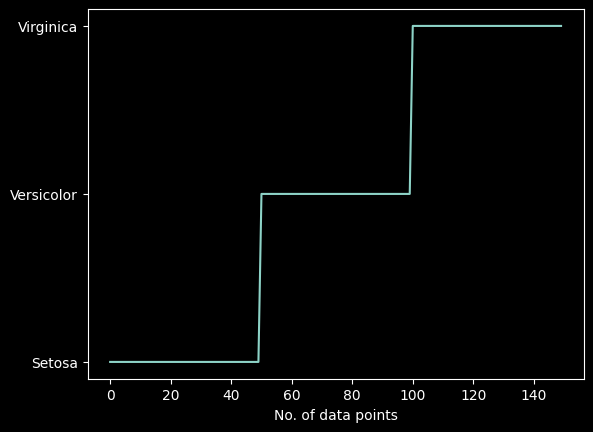

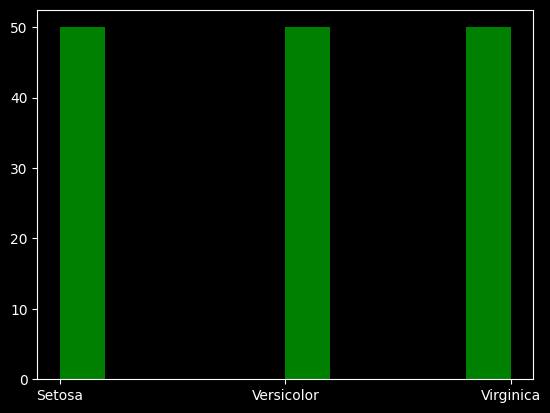

In [9]:
plt.plot(iris['variety'])
plt.xlabel('No. of data points')
plt.show()

plt.hist(iris['variety'], color='green')
plt.show()

In [10]:
print(iris.describe())

       sepal.length  sepal.width  petal.length  petal.width  total_value
count    150.000000   150.000000    150.000000   150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333    13.858000
std        0.828066     0.435866      1.765298     0.762238     3.123762
min        4.300000     2.000000      1.000000     0.100000     8.400000
25%        5.100000     2.800000      1.600000     0.300000    10.700000
50%        5.800000     3.000000      4.350000     1.300000    14.300000
75%        6.400000     3.300000      5.100000     1.800000    16.250000
max        7.900000     4.400000      6.900000     2.500000    20.400000


[]

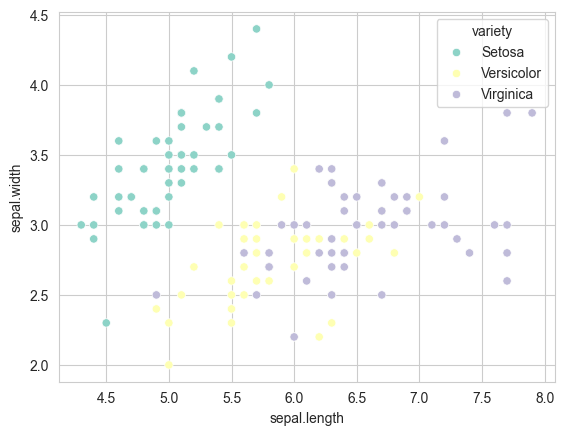

In [11]:
sb.set_style('whitegrid')
sb.scatterplot(data=iris, x='sepal.length', y='sepal.width', hue='variety')
plt.plot()

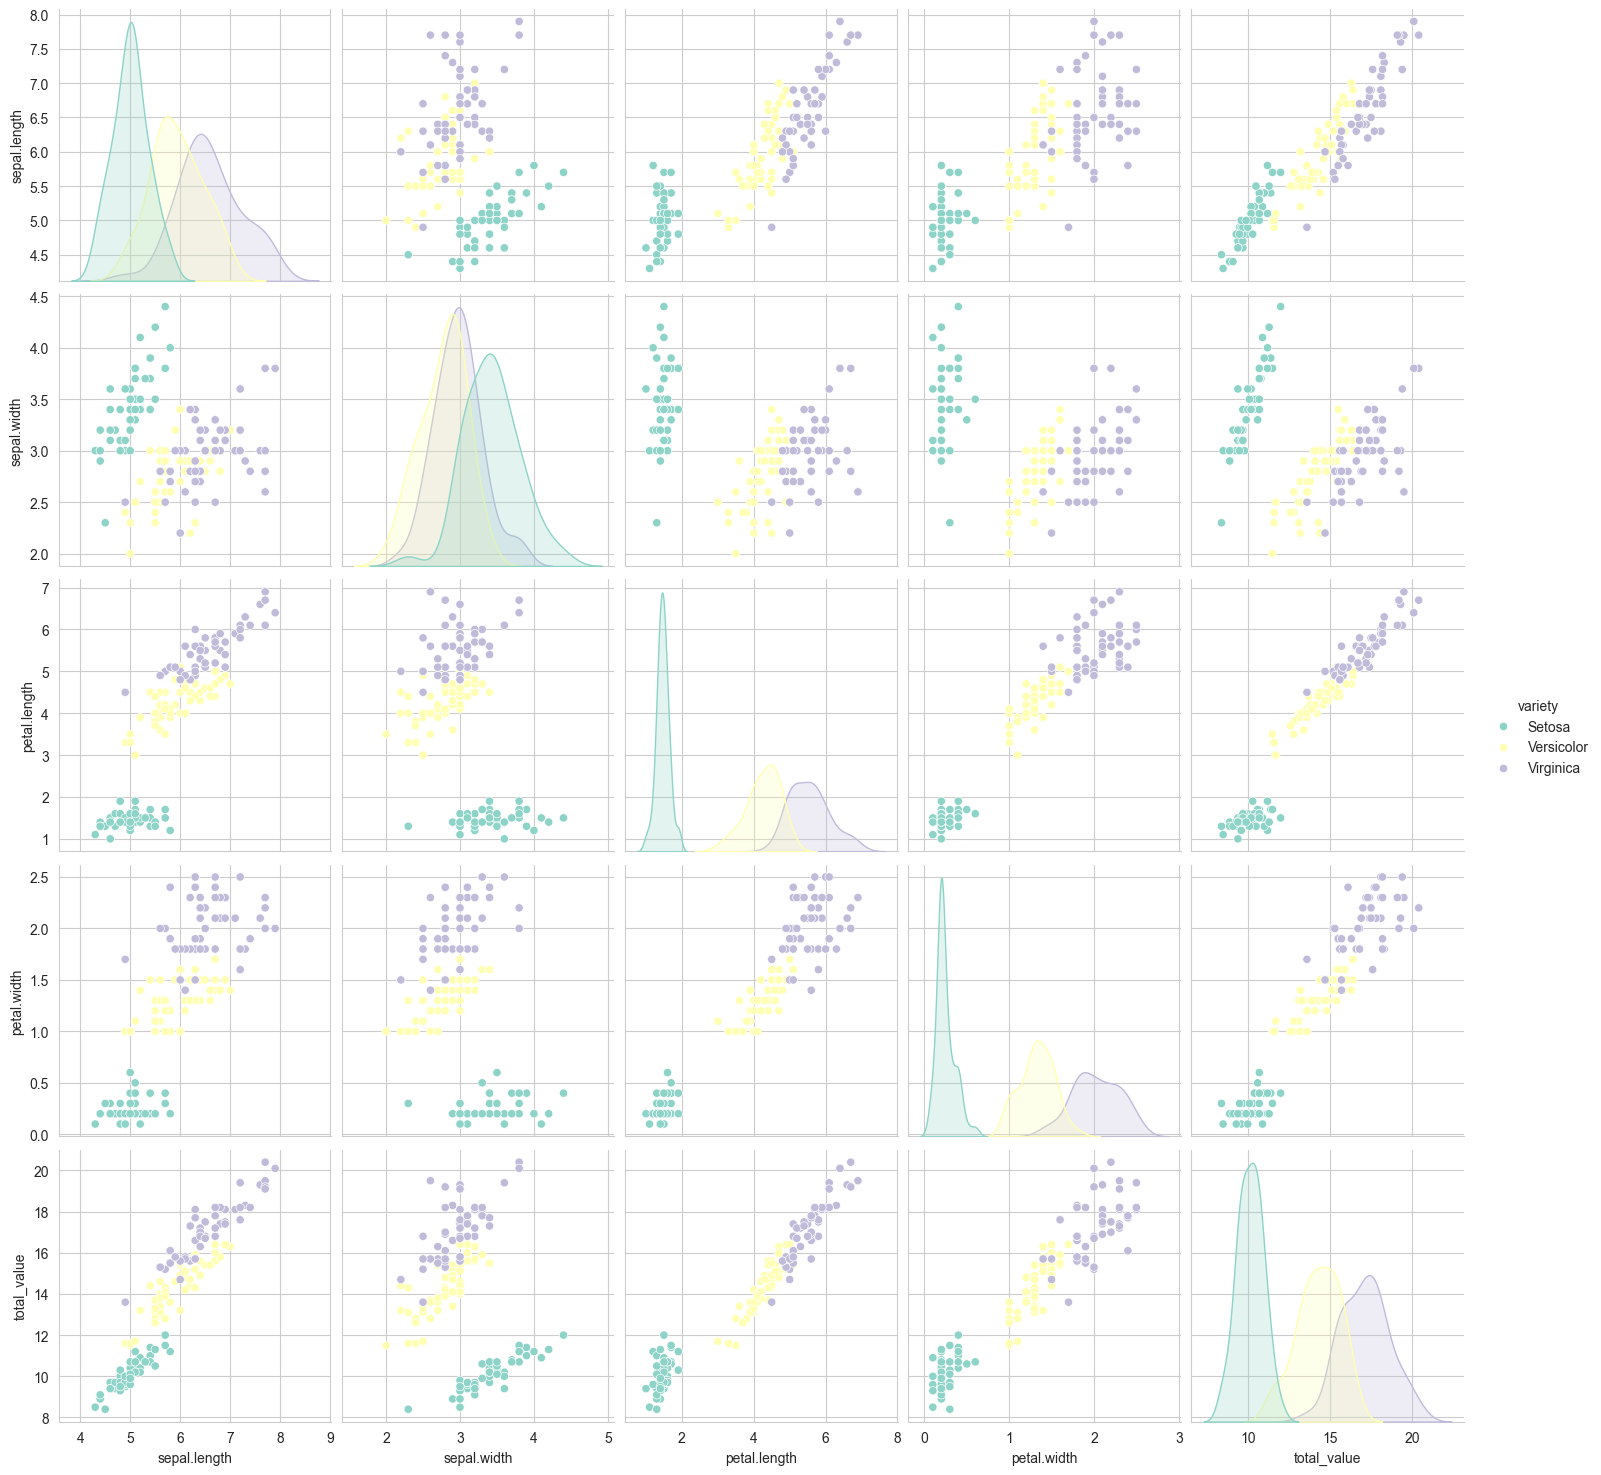

In [14]:
sb.set_style('whitegrid')
# sb.pairplot(iris, hue='variety', size=3)
sb.pairplot(iris, hue='variety', height=3)
plt.show()

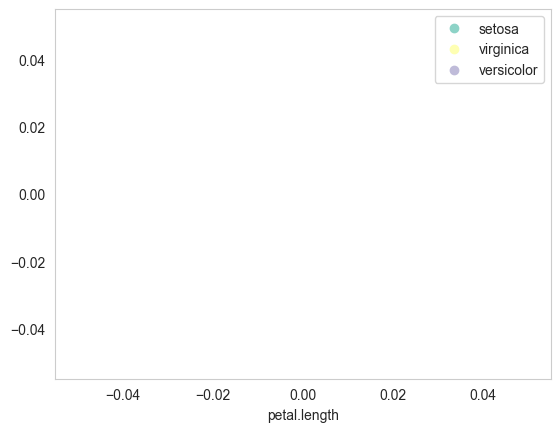

In [ ]:
iris_setosa = iris.loc[iris['variety'] == 'setosa']
iris_versicolor = iris.loc[iris['variety'] == 'versicolor']
iris_virginica = iris.loc[iris['variety'] == 'virginica']

plt.plot(iris_setosa['petal.length'], np.zeros_like(iris_setosa['petal.length']), 'o', label='setosa')
plt.plot(iris_virginica['petal.length'], np.zeros_like(iris_virginica['petal.length']), 'o', label='virginica')
plt.plot(iris_versicolor['petal.length'], np.zeros_like(iris_versicolor['petal.length']), 'o', label='versicolor')
plt.xlabel('petal.length')
plt.grid()
plt.legend()
plt.show()